##A1

In [1]:
import numpy as np

In [2]:
import numpy as np

def distance(array, value):
    """Calculate the Euclidean distance between array and value."""
    array = np.array(array)
    return np.linalg.norm(array - value, ord=2, axis=1)  # Giả sử array có nhiều hàng (samples)

def highest_rank(arr):
    """Find the most frequent element in an array."""
    count_num = {i: arr.count(i) for i in arr}
    return max(count_num, key=count_num.get)

def find_nearest_index(array, value, k):
    """Find the indices of the k nearest neighbors."""
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]  # Lấy k chỉ số gần nhất


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly generate data
N = 500  # Number of training samples per class
d = 2    # Data dimension
C = 3    # Number of classes (0, 1, 2)

# Centroids of each class dataset
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]  # Covariance matrix (identity matrix)

# Generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# Concatenate all data points (each column represents a data point)
X = np.concatenate((X0, X1, X2), axis=0).T

# Generate labels for each class:
# First 500 belong to class 0, next 500 belong to class 1, last 500 belong to class 2
original_label = np.asarray([0] * N + [1] * N + [2] * N).T


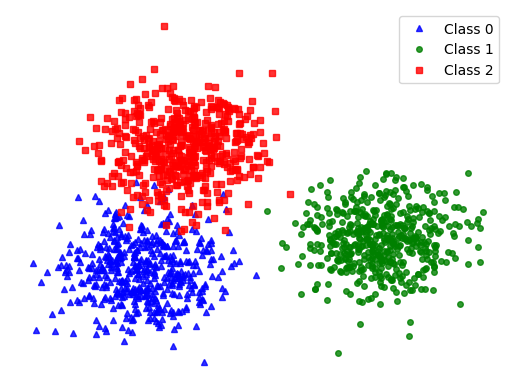

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def display(X, label):
    """Display scatter plot of dataset with different classes."""
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]

    plt.plot(X0[0, :], X0[1, :], 'b^', markersize=4, alpha=0.8, label="Class 0")
    plt.plot(X1[0, :], X1[1, :], 'go', markersize=4, alpha=0.8, label="Class 1")
    plt.plot(X2[0, :], X2[1, :], 'rs', markersize=4, alpha=0.8, label="Class 2")

    plt.axis("off")
    plt.legend()
    plt.show()

# Display the dataset
display(X, original_label)


In [5]:
X_train = np.concatenate((X0[:400], X1[:400], X2[:400]), axis = 0)

In [6]:
Y_train = np.concatenate((original_label[:400], original_label[500:900],
original_label[1000:1400]), axis = 0)
X_val = np.concatenate((X0[400:], X1[400:], X2[400:]), axis = 0)
Y_val = np.concatenate((original_label[400:500], original_label[900:1000],
original_label[1400:1500]), axis = 0)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(1200, 2) (1200,) (300, 2) (300,)


[0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 

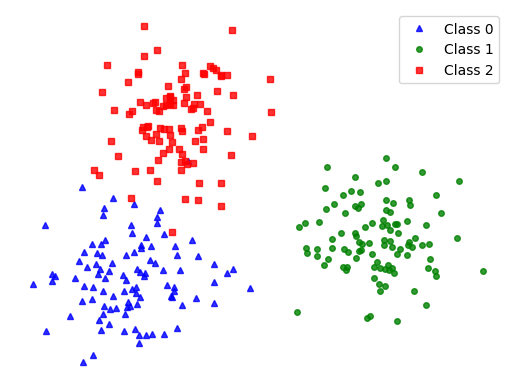

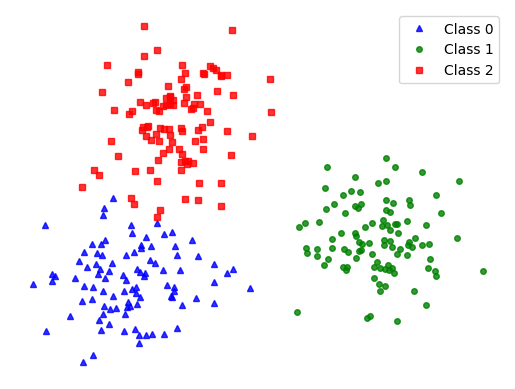

In [7]:
K = 20
y_pred = np.zeros(len(Y_val)).astype(int)

for j in range(len(Y_val)):
    indexes = find_nearest_index(X_train, X_val[j], K)
    y_nearest = []

    for i in range(K):
        y_nearest.append(Y_train[indexes[i]])

    y_pred[j] = highest_rank(y_nearest)

print(y_pred)
print(Y_val)

display(X_val.T, Y_val)
display(X_val.T, y_pred)


##A2

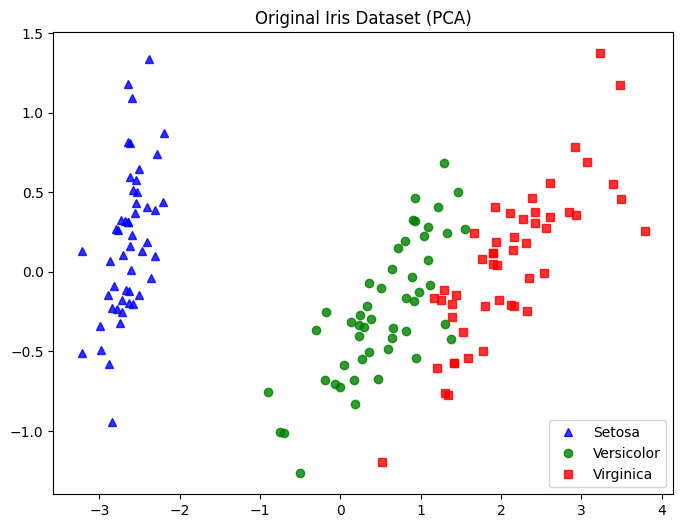

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Load data from CSV
iris_df = pd.read_csv('iris.csv')

# Separate features and target
X = iris_df.iloc[:, 0:4].values  # First 4 columns are features
y = iris_df['variety'].values    # Last column is the target

# Convert class labels to numeric
class_mapping = {"Setosa": 0, "Versicolor": 1, "Virginica": 2}
original_label = np.array([class_mapping[label] for label in y])

# Define function to display data points (adapted for 2D visualization using PCA)
def display(X, label, title=""):
    # For Iris dataset, we need to use PCA to visualize in 2D
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    X0 = X_pca[label == 0]
    X1 = X_pca[label == 1]
    X2 = X_pca[label == 2]

    plt.figure(figsize=(8, 6))
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize=6, alpha=0.8, label='Setosa')
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize=6, alpha=0.8, label='Versicolor')
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize=6, alpha=0.8, label='Virginica')

    if title:
        plt.title(title)
    plt.legend()
    plt.show()

# Display original data
display(X, original_label, "Original Iris Dataset (PCA)")

In [9]:
# Split the data into training and validation sets (40 samples per class for training, 10 for validation)
# We need to handle this differently since the data is already ordered by class
X_train = np.vstack((X[:40], X[50:90], X[100:140]))
Y_train = np.concatenate((original_label[:40], original_label[50:90], original_label[100:140]))

X_val = np.vstack((X[40:50], X[90:100], X[140:150]))
Y_val = np.concatenate((original_label[40:50], original_label[90:100], original_label[140:150]))

print("Shapes:", X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

Shapes: (120, 4) (120,) (30, 4) (30,)


In [10]:
# Function to find the most frequent element in a list
def highest_rank(arr):
    count_num = {}
    for i in arr:
        count_num[i] = arr.count(i)
    return max(count_num, key=count_num.get)

# Function to find K nearest neighbors
def find_nearest_index(X_train, x_val, K):
    distances = np.linalg.norm(X_train - x_val, axis=1)
    nearest_indices = np.argsort(distances)[:K]
    return nearest_indices

# Try different values of K
K_values = [1, 3, 5, 10, 15, 20]
results = {}

for K in K_values:
    # Initialize prediction array
    y_pred = np.zeros(len(Y_val)).astype(int)

    # Make predictions
    for j in range(len(Y_val)):
        indexes = find_nearest_index(X_train, X_val[j], K)
        y_nearest = []
        for i in range(K):
            y_nearest.append(Y_train[indexes[i]])
        y_pred[j] = highest_rank(y_nearest)

    # Calculate accuracy
    accuracy = np.mean(y_pred == Y_val)

    # Calculate confusion matrix
    cm = confusion_matrix(Y_val, y_pred)

    # Calculate precision (for each class)
    precision = precision_score(Y_val, y_pred, average=None)
    macro_precision = precision_score(Y_val, y_pred, average='macro')

    # Store results
    results[K] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'precision': precision,
        'macro_precision': macro_precision,
        'predictions': y_pred.copy()
    }

    print(f"\nResults for K={K}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Macro Precision: {macro_precision:.4f}")
    print("Class-wise Precision:", precision)
    print("Confusion Matrix:")
    print(cm)


Results for K=1:
Accuracy: 1.0000
Macro Precision: 1.0000
Class-wise Precision: [1. 1. 1.]
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Results for K=3:
Accuracy: 1.0000
Macro Precision: 1.0000
Class-wise Precision: [1. 1. 1.]
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Results for K=5:
Accuracy: 1.0000
Macro Precision: 1.0000
Class-wise Precision: [1. 1. 1.]
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Results for K=10:
Accuracy: 1.0000
Macro Precision: 1.0000
Class-wise Precision: [1. 1. 1.]
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Results for K=15:
Accuracy: 1.0000
Macro Precision: 1.0000
Class-wise Precision: [1. 1. 1.]
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Results for K=20:
Accuracy: 1.0000
Macro Precision: 1.0000
Class-wise Precision: [1. 1. 1.]
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [11]:
# Find the best K value
best_K = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest K value: {best_K} with accuracy: {results[best_K]['accuracy']:.4f}")


Best K value: 1 with accuracy: 1.0000


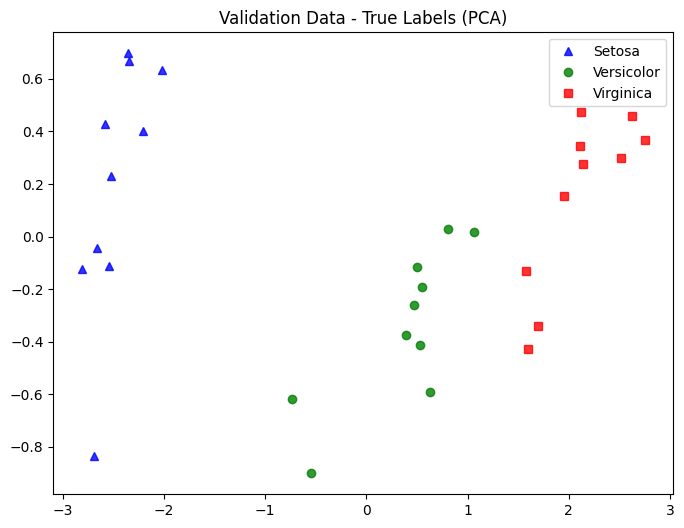

In [12]:
# Display the validation data with true labels
display(X_val, Y_val, f"Validation Data - True Labels (PCA)")

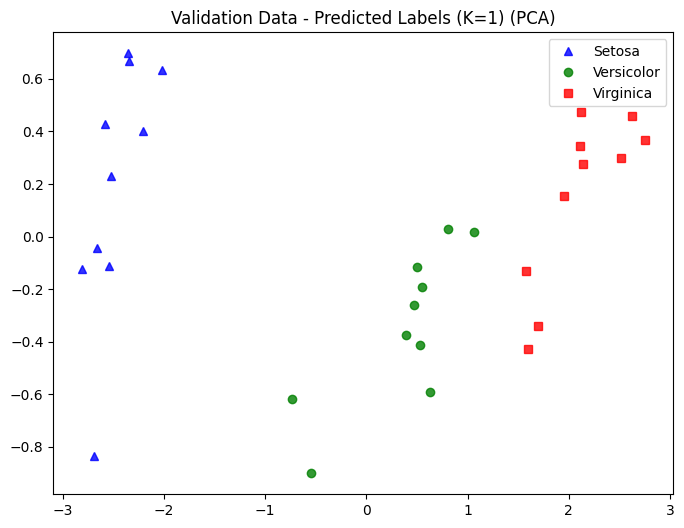

In [13]:
# Display the validation data with predicted labels using the best K
display(X_val, results[best_K]['predictions'], f"Validation Data - Predicted Labels (K={best_K}) (PCA)")

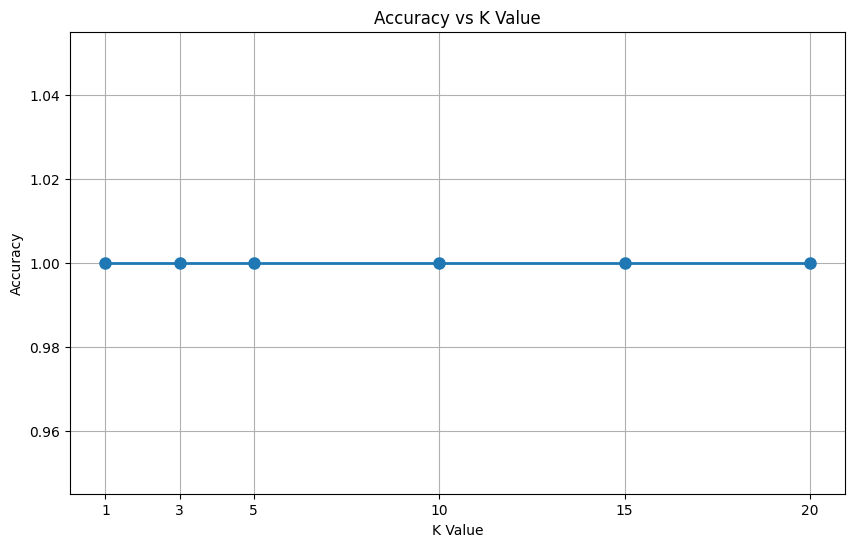

In [14]:
# Plot accuracy vs K
plt.figure(figsize=(10, 6))
accuracies = [results[k]['accuracy'] for k in K_values]
plt.plot(K_values, accuracies, 'o-', linewidth=2, markersize=8)
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(K_values)
plt.savefig('accuracy_vs_k.png')
plt.show()

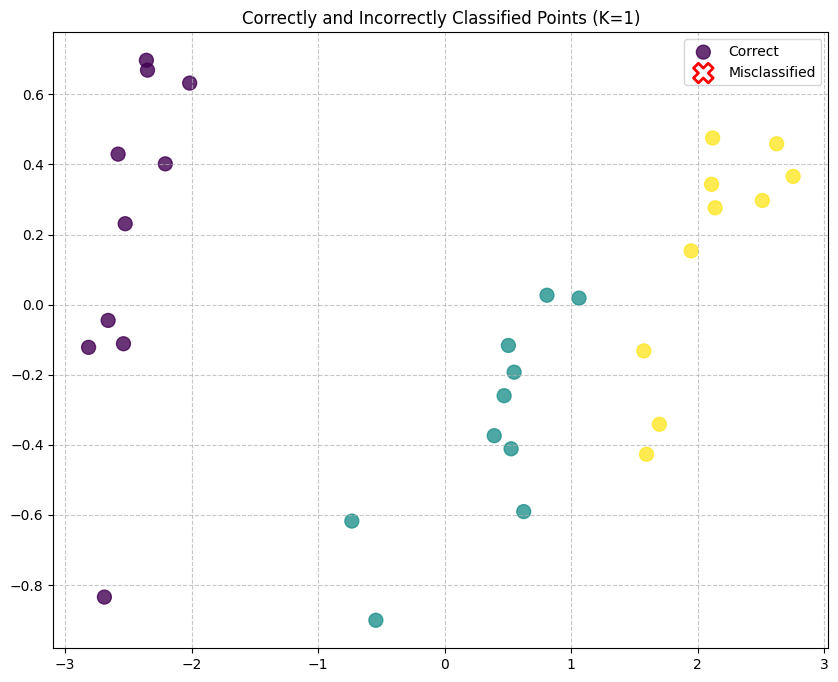

In [15]:
# Visualize misclassifications
best_preds = results[best_K]['predictions']
misclassified = Y_val != best_preds

# Use PCA to visualize in 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_val_pca = pca.fit_transform(X_val)

plt.figure(figsize=(10, 8))
plt.scatter(X_val_pca[~misclassified, 0], X_val_pca[~misclassified, 1],
            c=Y_val[~misclassified], cmap='viridis',
            marker='o', s=100, label='Correct', alpha=0.8)
plt.scatter(X_val_pca[misclassified, 0], X_val_pca[misclassified, 1],
            c=Y_val[misclassified], cmap='viridis',
            marker='X', s=200, edgecolor='red', linewidth=2, label='Misclassified')

plt.title(f'Correctly and Incorrectly Classified Points (K={best_K})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('misclassifications.png')
plt.show()

In [16]:
# Calculate detailed evaluation metrics for the best K
best_cm = results[best_K]['confusion_matrix']
class_names = ["Setosa", "Versicolor", "Virginica"]

print("\nDetailed Results for Best K:")
print("Confusion Matrix:")
print(best_cm)

print("\nPer-class recall:")
for i, class_name in enumerate(class_names):
    recall = best_cm[i, i] / best_cm[i, :].sum()
    print(f"{class_name}: {recall:.4f}")

print("\nPer-class precision:")
for i, class_name in enumerate(class_names):
    precision = best_cm[i, i] / best_cm[:, i].sum()
    print(f"{class_name}: {precision:.4f}")



Detailed Results for Best K:
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Per-class recall:
Setosa: 1.0000
Versicolor: 1.0000
Virginica: 1.0000

Per-class precision:
Setosa: 1.0000
Versicolor: 1.0000
Virginica: 1.0000


##B1

####a

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]
# generate 3 classes of datasets

In [18]:
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
# extended data by add row ONES (equivalent to 1) at first place
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)

# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [19]:
from scipy import sparse
def convert_labels(y, C = C):
  """
  convert 1d label to a matrix label: each column of this
  matrix coresponding to 1 element in y. In i-th column of Y,
  only one non-zeros element located in the y[i]-th position,
  and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

  [[1, 0, 0, 1],
  [0, 0, 1, 0],
  [0, 1, 0, 0]]
  """
  Y = sparse.coo_matrix((np.ones_like(y),(y, np.arange(len(y)))), shape = (C, len(y))).toarray()
  return Y

# Y = convert_labels(y, C)

In [20]:
def softmax_stable(Z):
  """
  Compute softmax values for each sets of scores in Z.
  each column of Z is a set of score.
  """
  e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
  A = e_Z / e_Z.sum(axis = 0)
  return A

def softmax(Z):
    """
    Compute softmax values for each set of scores in Z.
    Each column of Z is a set of scores.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis=0)
    return A


def softmax_regression(X, y, W_init, eta, tol=1e-4, max_count=10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20

    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta * xi.dot((yi - ai).T)
            count += 1

            # stopping criteria
            if count % check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W


In [21]:
# Cost or Loss Function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y * np.log(A))


# Predict that X belongs to which class (1..C now indexed as 0..C-1)
def pred(W, X):
    """
    Predict output of each column of X.
    The class of each x_i is determined by the location of the max probability.
    Note that classes are indexed by [0, 1, 2, ..., C-1].
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis=0)


# W[-1] is the solution, W is the history of all weights.


In [22]:
eta = .05
d = X.shape[0]
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 7.75833508 -3.90963968 -4.7818625 ]
 [-0.89076992  1.59149043 -0.52306457]
 [-1.42900636 -1.32905454  1.71069005]]


In [23]:
#Visualize
xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
print(XX.shape)


(1, 270400)
(3, 270400)


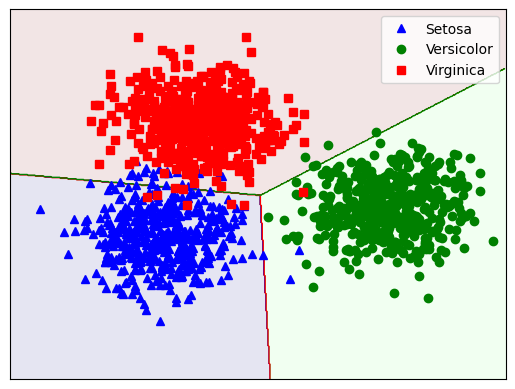

In [24]:
Z = pred(W[-1], XX)
Z = Z.reshape(xx.shape)
# Vẽ vùng quyết định (Decision Boundary)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha=0.1)

# Vẽ dữ liệu gốc bằng contour thay vì scatter
plt.contour(xx, yy, Z, levels=[0.5, 1.5, 2.5], colors=['red', 'green', 'blue'], linewidths=1)

# Vẽ dữ liệu gốc bằng plot()
plt.plot(X[1, original_label == 0], X[2, original_label == 0], '^b', label='Setosa')
plt.plot(X[1, original_label == 1], X[2, original_label == 1], 'og', label='Versicolor')
plt.plot(X[1, original_label == 2], X[2, original_label == 2], 'sr', label='Virginica')

plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
plt.legend()

plt.savefig('ex1_combined.png', bbox_inches='tight', dpi=300)
plt.show()

##B2

####a

Accuracy: 0.5
Confusion Matrix:
 [[ 8  2  0]
 [ 3  7  0]
 [ 0 10  0]]


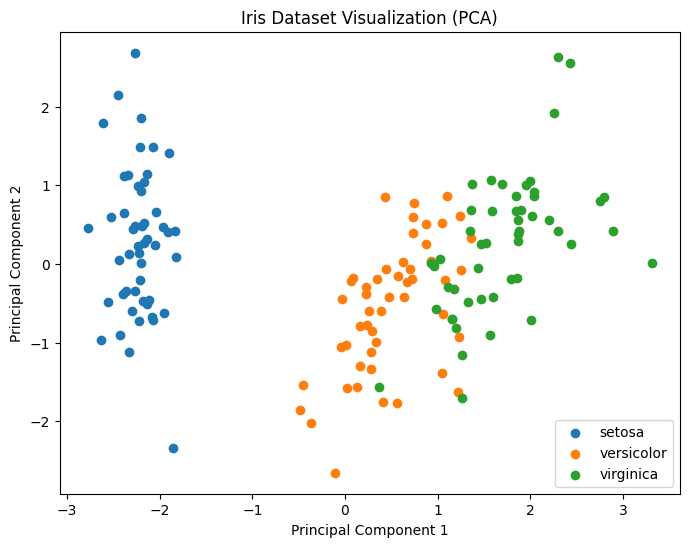

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse

# 1. Load dữ liệu Iris
iris = load_iris()
X = iris.data  # Dữ liệu đầu vào (4 features)
y = iris.target  # Nhãn đầu ra (0, 1, 2)

# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Chia dữ liệu thành train (80%) và validation (20%) theo mỗi lớp
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 4. Chuyển đổi nhãn thành One-Hot Encoding
def convert_labels(y, C):
    """Chuyển nhãn 1D thành ma trận One-Hot Encoding."""
    return sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()

C = 3  # Số lớp
Y_train = convert_labels(y_train, C)
Y_val = convert_labels(y_val, C)

# 5. Thêm bias (x0 = 1) vào dữ liệu đầu vào
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1).T
X_val = np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1).T

# 6. Hàm Softmax
def softmax(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Chuẩn hóa để tránh số lớn
    return e_Z / e_Z.sum(axis=0)

# 7. Hàm huấn luyện mô hình Softmax Regression
def softmax_regression(X, Y, eta=0.05, tol=1e-4, max_iter=10000):
    d, N = X.shape
    C = Y.shape[0]
    W = np.random.randn(d, C)  # Khởi tạo trọng số ngẫu nhiên
    count = 0
    check_w_after = 20

    while count < max_iter:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(W.T.dot(xi))
            W += eta * xi.dot((yi - ai).T)
            count += 1

            if count % check_w_after == 0:
                if np.linalg.norm(W - W) < tol:
                    return W
    return W

# 8. Huấn luyện mô hình
W_opt = softmax_regression(X_train, Y_train)

# 9. Hàm dự đoán lớp
def predict(W, X):
    A = softmax(W.T.dot(X))
    return np.argmax(A, axis=0)

# 10. Dự đoán trên tập validation
y_pred = predict(W_opt, X_val)

# 11. Đánh giá mô hình
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# 12. Giảm chiều dữ liệu và hiển thị kết quả trực quan
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i, label in enumerate(np.unique(y)):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=iris.target_names[label])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Iris Dataset Visualization (PCA)")
plt.legend()
plt.show()


####b

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris=load_iris()
# print(iris)
X=iris.data # Observed variable
Y=iris.target # Dependent variable (label)
#print(X.shape)
#print(Y.shape)
# Splitting Train and test Data
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2,
random_state=2)

#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)
# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
# and train model by Training Dataset
lorg.fit(X_train,Y_train)
# Then Predict the Test data
Y_pred=lorg.predict(X_test)
# for accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))
# for confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

0.9666666666666667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


##B3(Bài tập tự thực hành 2).

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8233
Confusion Matrix:
[[68  0  0  0  0  0  0  0  0  1  0  1  0  1  0  4  0  2  0  3]
 [ 0 79  3  1  0  5  2  0  0  0  0  1  1  1  1  1  0  1  0  1]
 [ 0  5 78  6  1  4  2  0  1  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  4  8 67  4  1  4  1  1  0  0  1  3  2  0  0  0  1  1  0]
 [ 0  3  2  8 74  1  2  0  0  0  0  0  3  0  0  1  1  1  0  0]
 [ 0  4  7  3  1 81  0  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  2 82  4  0  1  1  1  1  1  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  2 92  0  0  0  0  1  2  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  3  6 86  1  0  0  0  1  1  0  0  0  1  0]
 [ 0  1  0  1  0  1  2  0  0 87  4  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  3 92  0  0  0  0  0  0  0  1  0]
 [ 0  2  0  1  1  4  2  0  1  2  1 82  0  0  0  0  2  1  0  0]
 [ 0  4  0  1  1  1  2  4  0  0  0  0 84  0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  3  3  2  1  0  1  1 80  3  1  0  2  1  0]
 [ 1  1  0  0  1  2  2  0  0  0  0  0  0  3 88  1  0  0  0  0]
 [ 2  3  0  0  1  3 

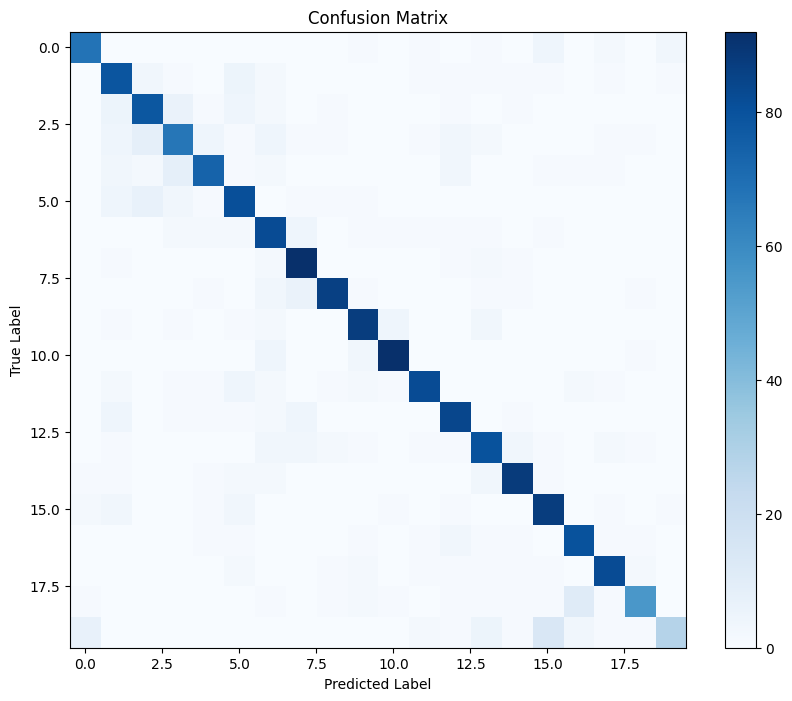

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
n_samples = 20000
X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y, test_size=0.1
)

# Create and train logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=5000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##B4(Bài tập tự thực hành 3).

In [28]:
from matplotlib import pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# change file_data to where did you put it!
file_data = '/content/glass.csv'
glass_df = pd.read_csv(file_data)
print(glass_df.info())
glass_types = glass_df['Type'].unique()
print(glass_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id_Number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  Type       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
None
[1 2 3 5 6 7]


In [29]:
print(glass_df['Type'].value_counts())
X_1 = glass_df[glass_df.columns[:-1]]
y_1 = glass_df['Type']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1,test_size=0.25,random_state=42)

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 1.0000
Confusion Matrix:
[[14  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


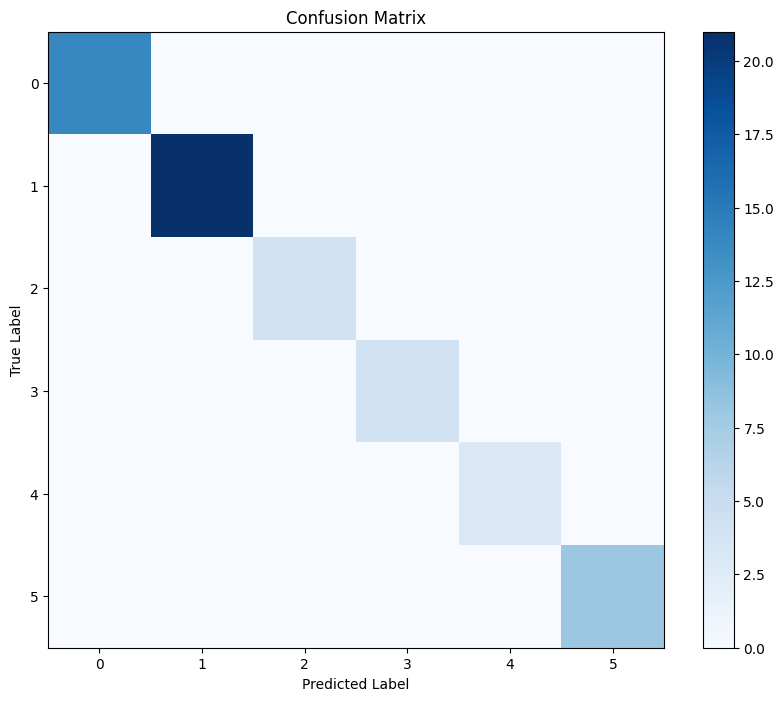

In [30]:
log_reg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=5000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
import os
import numpy as np
# set names to the paths because they're too long
data_path = '/content/'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [32]:
import gzip
import numpy as np

def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function returns random num_images in 60000 or 10000
    """

    # Open file training to read training data
    f_images = gzip.open(images_path, 'r')
    # Skip first 16 bytes (header information)
    f_images.read(16)

    # Determine the actual number of images to read
    real_num = num_images if not shuffle else (60000 if _is else 10000)

    # Read image data
    buf_images = f_images.read(image_size * image_size * real_num)
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size)

    # Read labels
    f_labels = gzip.open(labels_path, 'r')
    f_labels.read(8)
    labels = np.zeros((real_num), dtype=np.int64)

    # Assign labels to corresponding images
    for i in range(real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # Shuffle data if required
    if shuffle:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id]

    # Reshape images to vector form (flatten 28x28 to 784)
    images = images.reshape(num_images, image_size * image_size)

    return images, labels

In [33]:
train_images, train_labels = get_mnist_data(
train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(
test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

<ipython-input-32-de37b8f416b9>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)
(10000, 784) (10000,)


In [34]:
# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)

# These methods are from Vi du 1
def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y

def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis=0)
    return A

def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    A = e_Z / e_Z.sum(axis=0)
    return A


In [35]:
def pred(W, X):
  A = softmax_stable(W.T.dot(X))
  return np.argmax(A, axis = 0)

In [36]:
def _softmax_regression(X, Y, theta, lambda_=0.5, iterations=20, learning_rate=1e-5, batch_size=200):
    from sklearn.metrics import log_loss

    losses = []
    _theta = theta
    d, N = X.shape

    for iter_ in range(iterations):
        shuffle_index = np.random.permutation(N)
        for i in shuffle_index:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(10, 1)
            ai = softmax_stable(np.dot(_theta.T, xi))
            _theta += learning_rate * xi.dot((yi - ai).T)

            if (iter_ * N + i) % batch_size == 0:
                Y_hat = np.dot(_theta.T, X)
                losses.append(log_loss(Y, Y_hat))

        Y_hat = np.dot(_theta.T, X)
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")

    return _theta, losses


3 1


<Figure size 640x480 with 0 Axes>

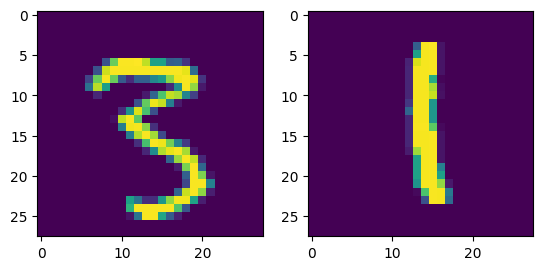

In [37]:
# For display and test digit :D
import random
import matplotlib.pyplot as plt
import numpy as np

# Randomly select an index
index = random.randint(0, 1000)

# Print corresponding labels
print(train_labels[index], test_labels[index])

# Convert images to proper format
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()

# Create figure for visualization
plt.figure()

# Create subplots (1 row, 2 columns)
f, axarr = plt.subplots(1, 2)

# Display images
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)

plt.show()


In [38]:
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T),
axis = 0)

Y_train = convert_labels(train_labels, 10)

In [39]:
theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, Y_train, theta)
print('training success: ', opt_theta.shape, len(losses))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 0 - cost 0.038965807167226064


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 1 - cost 0.018795205336075687


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 2 - cost 0.0180218266945586


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 3 - cost 0.010813096016735168


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 4 - cost 0.008650476813388139


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 5 - cost 0.01226224654123518


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 6 - cost 0.007929603745605796


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 7 - cost 0.007208730677823454


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 8 - cost 0.005046111474476423


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 9 - cost 0.005046111474476423


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 10 - cost 0.007208730677823454


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 11 - cost 0.005096243079823203


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 12 - cost 0.00432523840669408


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 13 - cost 0.006490254143321188


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 14 - cost 0.00432523840669408


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 15 - cost 0.0036043653389117368


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 16 - cost 0.0028834922711293946


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 17 - cost 0.0028834922711293946


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 18 - cost 0.0036043653389117368


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: T

epoch 19 - cost 0.0021626192033470507
training success:  (785, 10) 500


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


In [40]:
from sklearn.metrics import accuracy_score
print('accuracy training data: ', accuracy_score(train_labels,
pred(opt_theta, X_train)))

# test_images, test_labels = get_mnist_data(
# test_images_path, test_labels_path, 1000, _is=False, shuffle=False)
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T),
axis = 0)

print(X_test.shape)
print('accuracy testing data: ', accuracy_score(test_labels,

pred(opt_theta, X_test)))

accuracy training data:  0.9356
(785, 10000)
accuracy testing data:  0.8672
